**Task 1 : Analyze sales data over time and forecast future sales**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading

In [47]:
# import data
sales_df = pd.read_csv('/content/drive/MyDrive/sales.csv', parse_dates=['Timestamp'])

# Data Exploration

In [48]:
sales_df.info() # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           374 non-null    datetime64[ns]
 1   Sales Amount (USD)  374 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.0 KB


In [49]:
sales_df.head() # Display top 5 records

,Timestamp,Sales Amount (USD)
0,2000-01-01,1000
1,2000-02-01,1100
2,2000-03-01,1050
3,2000-04-01,1200
4,2000-05-01,1150


# Data Cleaning

In [50]:
sales_df.isna().sum() # Print the sum of missing values

,0
Timestamp,0
Sales Amount (USD),0


Since, the sum of missing values, so there is no need to replace the missing values.

In [51]:
print(sales_df.duplicated().sum())  # Print the sum of duplicated values

0


Since, the sum of duplicated values, so there is no need to drop duplicates.

# Data Visualization

Plot sales data

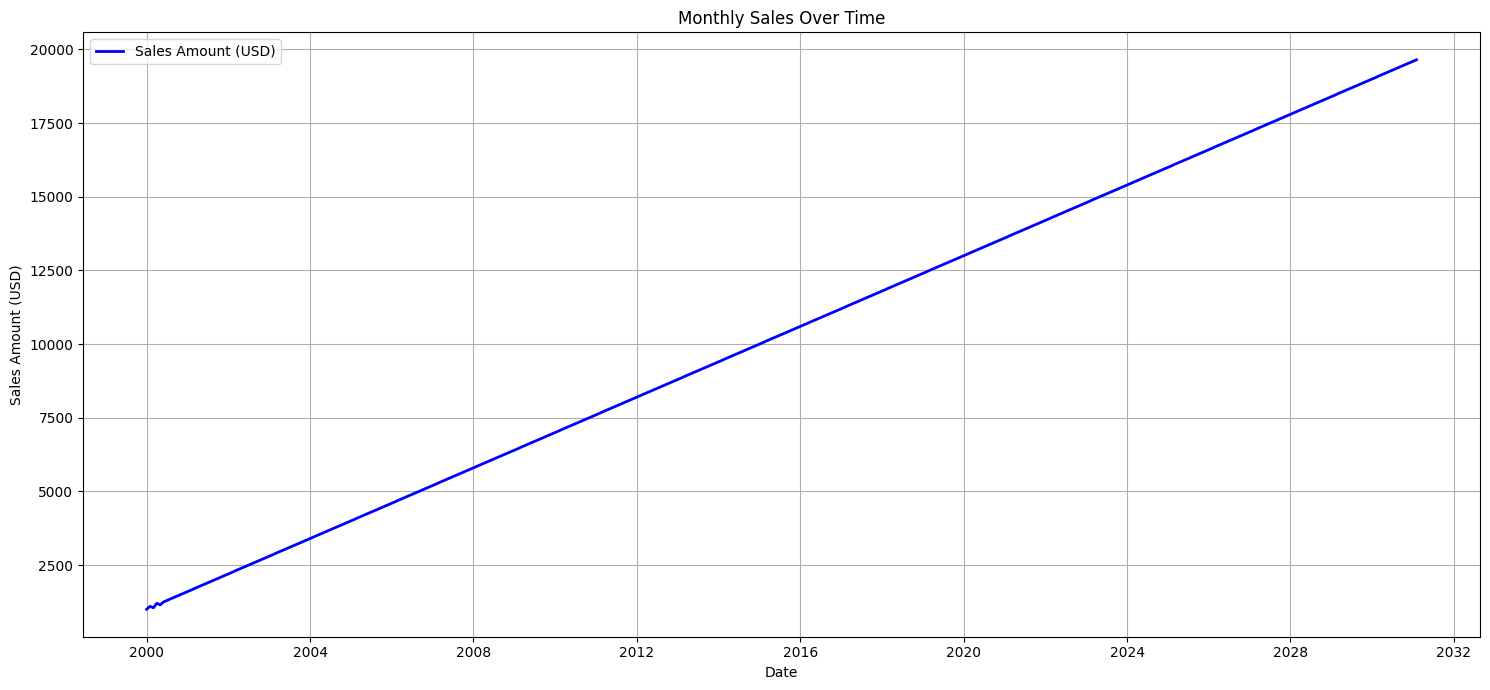

In [52]:
# Set the Timestamp as the DataFrame index for time series plotting
sales_df.set_index('Timestamp', inplace=True)

# Create a line plot
plt.figure(figsize=(15, 7))
plt.plot(sales_df.index, sales_df['Sales Amount (USD)'], color='blue', linewidth=2, label='Sales Amount (USD)')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Line plot of moving averages

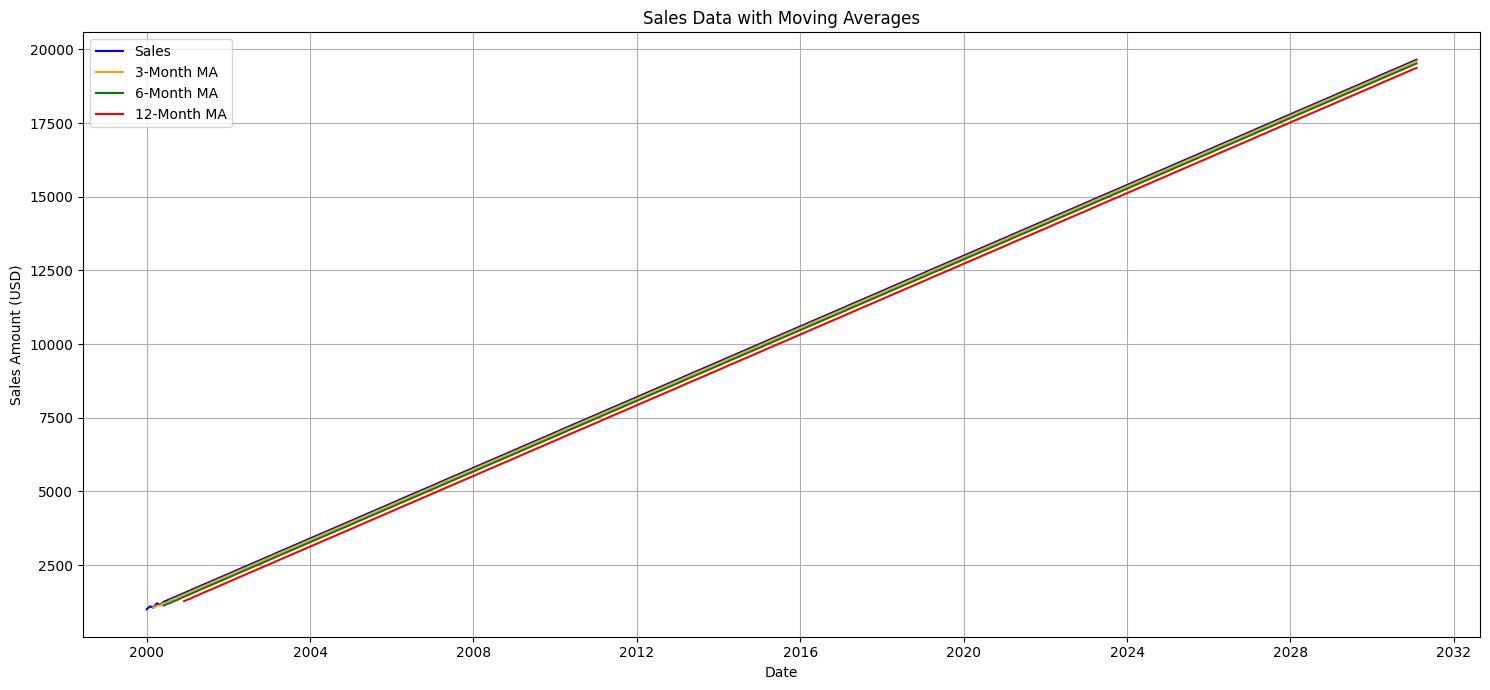

In [53]:
# Calculate moving averages
sales_df['MA_3'] = sales_df['Sales Amount (USD)'].rolling(window=3).mean()
sales_df['MA_6'] = sales_df['Sales Amount (USD)'].rolling(window=6).mean()
sales_df['MA_12'] = sales_df['Sales Amount (USD)'].rolling(window=12).mean()

plt.figure(figsize=(15, 7))

# Plot original sales line
plt.plot(sales_df.index, sales_df['Sales Amount (USD)'], label='Sales', color='blue', linewidth=1.5)

# Plot moving averages
plt.plot(sales_df.index, sales_df['MA_3'], label='3-Month MA', color='orange')
plt.plot(sales_df.index, sales_df['MA_6'], label='6-Month MA', color='green')
plt.plot(sales_df.index, sales_df['MA_12'], label='12-Month MA', color='red')

plt.title('Sales Data with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales Amount (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Sales Forecasting

In [54]:
# Fit ARIMA model
model = ARIMA(sales_df['Sales Amount (USD)'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Sales Amount (USD)   No. Observations:                  374
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1031.970
Date:                Mon, 28 Jul 2025   AIC                           2075.940
Time:                        16:27:53   BIC                           2099.470
Sample:                    01-01-2000   HQIC                          2085.283
                         - 02-01-2031                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2032      0.015    -78.047      0.000      -1.233      -1.173
ar.L2          0.1456      0.021      6.898      0.000       0.104       0.187
ar.L3          1.0994      0.017     65.573      0.0

Forecast Sales of next 12 months

In [55]:
# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create datestamp for future periods
last_date = sales_df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps+1, freq='MS')[1:]
forecast_df = pd.DataFrame({'Forecast': forecast.values}, index=forecast_index)
print(forecast_df)

            Forecast
2031-03-01  19699.97
2031-04-01  19749.98
2031-05-01  19799.94
2031-06-01  19849.93
2031-07-01  19899.90
2031-08-01  19949.87
2031-09-01  19999.85
2031-10-01  20049.80
2031-11-01  20099.77
2031-12-01  20149.71
2032-01-01  20199.67
2032-02-01  20249.62


Line plot for Actual and Forecast sales

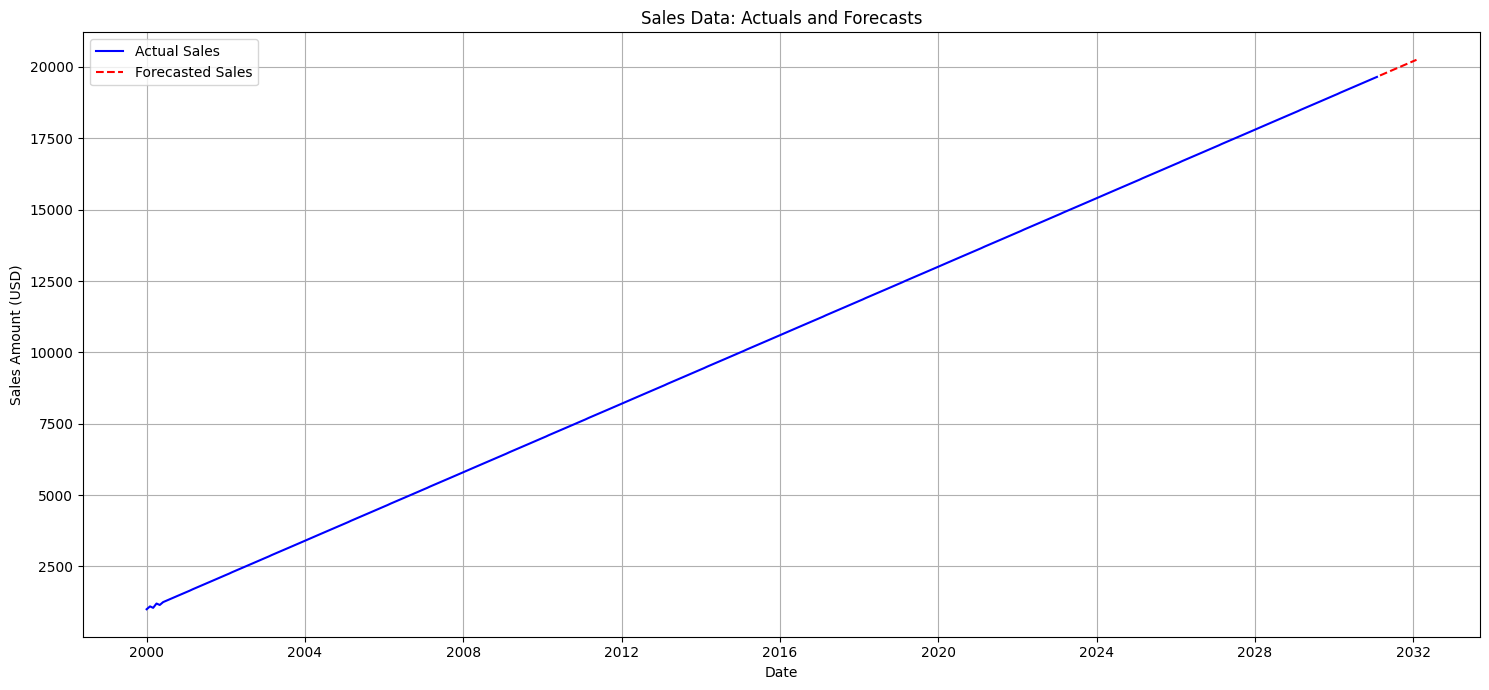

In [56]:
plt.figure(figsize=(15, 7))

# Plot the actual sales data
plt.plot(sales_df.index, sales_df['Sales Amount (USD)'], label='Actual Sales', color='blue')

# Plot the future sales forecast
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', color='red', linestyle='--')

plt.title('Sales Data: Actuals and Forecasts')
plt.xlabel('Date')
plt.ylabel('Sales Amount (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Model Training

In [57]:
# Split 80% for training, 20% for testing
train_size = int(len(sales_df) * 0.8)
train, test = sales_df.iloc[:train_size], sales_df.iloc[train_size:]

In [58]:
# Fit the ARIMA model on the training data
order = (5, 1, 0)
model = ARIMA(train['Sales Amount (USD)'], order=order)
model_fit = model.fit()

# Forecast for the number of points in the test set
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Model evaluation

In [59]:
# Calculate the metrics
mse = mean_squared_error(test['Sales Amount (USD)'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Sales Amount (USD)'], forecast)

# Print metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 45.58
RMSE: 6.75
MAE: 5.12


**Task 2 : Predicting Heart Disease**

# Data Loading

In [60]:
# import data
heart_disease_df = pd.read_csv('/content/drive/MyDrive/heart_disease.csv')

# Data Exploration

In [61]:
heart_disease_df.info() # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [62]:
heart_disease_df.head() # Display top 5 records

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.30,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.70,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.00,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.20,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.30,3,2,1


# Data Cleaning

In [63]:
print(heart_disease_df.isna().sum().sum())  # Print the sum of missing values

0


Since, the sum of missing values is zero, so there is no need to replace missing values.

In [64]:
print(heart_disease_df.duplicated().sum())  # Print the sum of duplicated values

0


Since, the sum of duplicated values is zero, so there is no need to drop duplicates.

Check for outliers

In [65]:
# Specify the columns for outlier removal
cols = ['age', 'serumcholestrol', 'restingBP']

# Remove outliers using IQR
for col in cols:
    Q1 = heart_disease_df[col].quantile(0.25)
    Q3 = heart_disease_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    heart_disease_df = heart_disease_df[(heart_disease_df[col] >= lower) & (heart_disease_df[col] <= upper)]

    # Boolean mask for outliers
    outliers = (heart_disease_df[col] < lower) | (heart_disease_df[col] > upper)
    print(f'Number of {col} outliers:', outliers.sum())
    print(heart_disease_df.loc[outliers, col])

Number of age outliers: 0
Series([], Name: age, dtype: int64)
Number of serumcholestrol outliers: 0
Series([], Name: serumcholestrol, dtype: int64)
Number of restingBP outliers: 0
Series([], Name: restingBP, dtype: int64)


In [66]:
print(f"Shape after removing outliers: {heart_disease_df.shape}")

Shape after removing outliers: (1000, 14)


# Feature Engineering

In [67]:
from sklearn.preprocessing import StandardScaler

# Specify the numerical features to scale
numerical_features = ['age', 'serumcholestrol', 'restingBP']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform these features
scaled_features = scaler.fit_transform(heart_disease_df[numerical_features])

# Add the scaled columns to your DataFrame for comparison
for i, col in enumerate(numerical_features):
    heart_disease_df[f'scaled_{col}'] = scaled_features[:, i]

In [68]:
heart_disease_df.head() # Check for newly added columns

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,scaled_age,scaled_serumcholestrol,scaled_restingBP
0,103368,53,1,2,171,0,0,1,147,0,5.30,3,3,1,0.21,-2.35,0.64
1,119250,40,1,0,94,229,0,1,115,0,3.70,1,1,0,-0.52,-0.62,-1.93
2,119372,49,1,2,133,142,0,0,202,1,5.00,1,0,0,-0.01,-1.28,-0.63
3,132514,43,1,0,138,295,1,1,153,0,3.20,2,2,1,-0.35,-0.12,-0.46
4,146211,31,1,1,199,0,0,2,136,0,5.30,3,2,1,-1.02,-2.35,1.58


# Model training and evaluation

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

features = ['scaled_age', 'scaled_serumcholestrol', 'scaled_restingBP']  # Add or modify features as needed
X = heart_disease_df[features]
y = heart_disease_df['target']

# Split the dataset into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
a_s = accuracy_score(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
r_s = recall_score(y_test, y_pred)
f_s = f1_score(y_test, y_pred)

# Print
print(f'Accuracy: {a_s:.2f}')
print(f"Precision: {p_s:.2f}")
print(f"Recall: {r_s:.2f}")
print(f"F1 Score: {f_s:.2f}")

# Print confusion matrix and report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84
Precision: 0.89
Recall: 0.84
F1 Score: 0.86

Confusion Matrix:
 [[71 12]
 [19 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        83
           1       0.89      0.84      0.86       117

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

